# **Caltech - Machine Learning Course**

## LAB:  🎸 SPOTIFY - Creating Cohorts of Songs

### NOTEBOOK:  Data Refinement, Analysis, and Feature Engineering
### Project Statement
Problem Scenario:
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

Data Description:
The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.


| Variable 	    | Description |
| --------      | -------
| name	        | It is the name of the song. |
| album	        | It is the name of the album.
| release_date	| It is the day, month, and year the album was released. |
| track number	| It is the order in which the song appears on the album. |
| id	        | It is the Spotify ID for the song. |
| uri	        | It is the Spotify URI for the song. |
| acousticness	| A confidence measure from 0.0 to 1.0 indicates whether the track is acoustic. 1.0 represents high confidence that the track is acoustic. |
| danceability	| It describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable, and 1.0 is the most danceable. |
| energy	    | It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness	| It predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal." The closer the instrumentalness value is to 1.0, the greater the likelihood that the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness	    | It detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. |
| loudness	    | The overall loudness of a track in decibels (dB) and loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB. |
| speechiness	| It detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| tempo	        | The overall estimated tempo of a track is measured in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| valence	    | A measure from 0.0 to 1.0 describes the musical positivity conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). |
| popularity	| The popularity of the song ranges from 0 to 100. |
|duration_ms	| It is the duration of the track in milliseconds. |


### Notebook Objective
Perform exploratory data analysis and feature engineering. 

a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album. 

b.	Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns. 

c.	Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved. 

d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations. 


<hr/>


---

## Module 1: Analysis Environment Setup

### Purpose
This module establishes the analytical environment for advanced data analysis and feature engineering, building upon the cleaned data from the previous wrangling notebook.

### Key Components

#### **Library Configuration**
- **Core Libraries**: pandas, numpy, matplotlib, seaborn for data manipulation and visualization
- **Machine Learning**: sklearn for preprocessing, PCA, clustering, and evaluation metrics
- **Specialized Tools**: scipy for statistical analysis, matplotlib.colors for advanced visualizations

#### **Data Loading Infrastructure**
Reuses standardized loading functions:
- `load_csv_data()`: Primary dataset loading
- `load_excel_data()`: Data dictionary and metadata
- `load_processed_csv_data()`: Preprocessed data from previous notebooks

#### **Integration with Styling Framework**
- Imports custom Rolling Stones styling via `%run "./00_Py_Spotify_Styling.ipynb"`
- Ensures consistent visual branding across all analysis notebooks
- Provides access to STONES_PALETTE, FIGURE_SIZES, and styling functions

### Initialization Steps
1. **Library Import**: Comprehensive data science stack
2. **Function Definition**: Standardized data loading utilities  
3. **Data Loading**: Primary Rolling Stones dataset and feature dictionary
4. **Style Integration**: Custom visual styling for professional presentation

### Technical Architecture
```python
# Consistent data loading pattern
df = load_csv_data('rolling_stones_spotify.csv', directory='.')
features_dict = load_excel_data('Data Dictionary - Creating cohorts of songs.xlsx', directory='.')

# Visual styling integration
%run "./00_Py_Spotify_Styling.ipynb"
```

### Preparation for Analysis
This module sets the foundation for:
- Album popularity analysis
- Correlation studies  
- Feature engineering
- Temporal trend analysis
- Advanced visualizations

---


In [7]:
import typing as tp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

# Machine Learning and Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Visualization
from matplotlib.colors import ListedColormap

# ===================================================================
# DATA LOADING UTILITIES
# ===================================================================

def load_csv_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load CSV file."""
    full_path = os.path.join(directory, filename)
    return pd.read_csv(full_path)

def load_excel_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load Excel file."""
    full_path = os.path.join(directory, filename)
    return pd.read_excel(full_path)

def load_processed_csv_data(filename: str, directory: str = '.') -> pd.DataFrame:
    """Load processed data from a CSV file."""
    full_path = os.path.join(directory, filename)
    return pd.read_csv(full_path)



# Load the data into a DataFrame
df: pd.DataFrame = load_csv_data('rolling_stones_spotify.csv', directory='.')
features_dict: pd.DataFrame = load_excel_data('Data Dictionary - Creating cohorts of songs.xlsx', directory='.')

# Run Styling functions
%run "./00_Py_Spotify_Styling.ipynb"

---

## Module 2: Data Integration and Validation

### Purpose
This module loads the preprocessed datasets from the data wrangling phase and validates their integrity for advanced analysis.

### Key Operations

#### **Preprocessed Data Loading**
Loads four specialized datasets created during data wrangling:
- **`full_tracks.csv`**: Complete cleaned dataset (1508 × 16)
- **`clustering_tracks.csv`**: Audio features only (1508 × 10) 
- **`outliers.csv`**: Identified outlier instances (406 × 17)
- **`flagged_tracks.csv`**: Tracks with significant feature differences (42 × 16)

#### **Data Integrity Verification**
- **Shape Validation**: Confirms expected dimensions for each dataset
- **Content Preview**: Displays sample rows to verify data structure
- **Statistical Summary**: Reviews audio feature distributions

#### **Dataset Relationships**
```
┌─────────────────┐    ┌──────────────────┐
│   full_tracks   │────│ clustering_tracks │
│   (1508 × 16)   │    │   (1508 × 10)     │
└─────────────────┘    └──────────────────┘
         │                       │
         ├───────────────────────┼─────────┐
         │                       │         │
    ┌─────────┐              ┌────────┐   │
    │outliers │              │flagged │   │
    │(406×17) │              │(42×16) │   │
    └─────────┘              └────────┘   │
                                          │
                            ┌─────────────┴─────────────┐
                            │    AUDIO_FEATURES         │
                            │ ['acousticness',          │
                            │  'danceability',          │
                            │  'energy', ...]           │
                            └───────────────────────────┘
```

### Data Quality Confirmation

#### **Successful Data Processing Results**:
- ✅ **1508 tracks** successfully cleaned and deduplicated
- ✅ **No missing values** in any dataset
- ✅ **Consistent dimensions** across related datasets
- ✅ **Feature distributions** within expected ranges

#### **Statistical Validation**:
The summary statistics confirm data quality:
- **Audio features** properly normalized (0-1 scale except loudness/tempo)
- **Popularity scores** spanning full 0-100 range
- **Feature relationships** consistent with musical theory

### Preparation for Advanced Analysis
This validated, multi-layered dataset structure enables:
- **Album-level analysis** using full_tracks
- **Clustering algorithms** using clustering_tracks  
- **Outlier investigation** using outliers dataset
- **Quality control** using flagged_tracks

### Technical Implementation
```python
# Load all preprocessed datasets
full_tracks = pd.read_csv('../data/processed/full_tracks.csv')
clustering_tracks = pd.read_csv('../data/processed/clustering_tracks.csv') 
outliers = pd.read_csv('../data/processed/outliers.csv')
flagged_tracks = pd.read_csv('../data/processed/flagged_tracks.csv')

# Validate data integrity
print(f"Full Tracks: {full_tracks.shape[0]} rows, {full_tracks.shape[1]} columns")
display(full_tracks[AUDIO_FEATURES].describe())
```

---


In [8]:

# Load the datasets
full_tracks = pd.read_csv('../data/processed/full_tracks.csv')
clustering_tracks = pd.read_csv('../data/processed/clustering_tracks.csv')
outliers = pd.read_csv('../data/processed/outliers.csv')
flagged_tracks = pd.read_csv('../data/processed/flagged_tracks.csv')

# Display basic information about our datasets
print("Dataset Information:")
print(f"Full Tracks: {full_tracks.shape[0]} rows, {full_tracks.shape[1]} columns")
print(f"Clustering Tracks: {clustering_tracks.shape[0]} rows, {clustering_tracks.shape[1]} columns")
print(f"Outliers: {outliers.shape[0]} rows, {outliers.shape[1]} columns")
print(f"Flagged Tracks: {flagged_tracks.shape[0]} rows, {flagged_tracks.shape[1]} columns")

# Display the first few rows of the full_tracks dataset
print("\nFirst few rows of full_tracks:")
display(full_tracks.head())

# Display summary statistics of audio features
print("\nSummary statistics of audio features:")
display(full_tracks[AUDIO_FEATURES].describe())

Dataset Information:
Full Tracks: 1508 rows, 16 columns
Clustering Tracks: 1508 rows, 10 columns
Outliers: 406 rows, 17 columns
Flagged Tracks: 42 rows, 16 columns

First few rows of full_tracks:


,name,album,release_date,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,flagged_for_differences
0,"Paint It, Black",Aftermath,1966-04-15,63T7DJ1AFDD6Bn8VzG6JE8,0.0493,0.464,0.795,0.00244,0.3990,-9.267,0.0926,158.691,0.612,80,202266,False
1,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,0.863,0.03170,0.1280,-7.890,0.0338,136.302,0.931,76,222813,False
2,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,7HKez549fwJQDzx3zLjHKC,0.0436,0.631,0.932,0.13700,0.0918,-4.142,0.0354,122.429,0.971,76,213066,False
3,Gimme Shelter,Let It Bleed,1969-12-05,6H3kDe7CGoWYBabAeVWGiD,0.4470,0.634,0.630,0.03900,0.1700,-8.277,0.0310,118.628,0.489,76,270773,True
4,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1Ud6moTC0KyXMq1Oxfien0,0.5180,0.702,0.668,0.00000,0.0588,-9.237,0.2140,116.063,0.561,73,378146,False



Summary statistics of audio features:


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.246013,0.466386,0.794603,0.168903,0.494781,-6.901288,0.068725,126.141257,0.581781
std,0.226612,0.142453,0.179613,0.279824,0.349883,2.968309,0.049435,29.371197,0.233460
min,0.000009,0.104000,0.141000,0.000000,0.021900,-24.408000,0.023200,46.525000,0.000000
25%,0.054475,0.360000,0.676500,0.000253,0.153000,-8.934250,0.036500,107.443000,0.402750
50%,0.177000,0.454000,0.853000,0.014150,0.385000,-6.425000,0.051000,124.319500,0.583000
75%,0.400000,0.575000,0.946000,0.186000,0.895750,-4.582500,0.085425,142.464000,0.781000
max,0.994000,0.887000,0.999000,0.996000,0.998000,-1.014000,0.624000,216.304000,0.974000


---

## Module 3: Album Popularity Analysis and Recommendation Engine

### Purpose
This module analyzes album-level popularity patterns to identify the top Rolling Stones albums for music recommendation based on both quantity and quality of popular tracks.

### Key Components

#### **1. Popularity Threshold Definition**
```python
popularity_threshold = full_tracks['popularity'].quantile(0.75)
full_tracks['is_popular'] = full_tracks['popularity'] >= popularity_threshold
```
- Uses **75th percentile** as popularity threshold (data-driven approach)
- Creates binary `is_popular` flag for track classification
- Ensures consistent definition of "popular" across analysis

#### **2. Album-Level Aggregation Strategy**
```python
album_popularity = full_tracks.groupby('album').agg({
    'popularity': 'mean',
    'is_popular': ['sum', 'count']
}).reset_index()
```

**Multi-Metric Analysis**:
- **Average Popularity**: Overall album appeal
- **Popular Track Count**: Number of hits per album
- **Total Tracks**: Album comprehensiveness
- **Popular Ratio**: Percentage of tracks that are popular

#### **3. Album Filtering and Ranking**
```python
filtered_albums = album_popularity[
    (album_popularity['popular_track_count'] >= mean_popular_tracks)
].sort_values('popular_track_count', ascending=False)
```

**Selection Criteria**:
- Must have **above-average** number of popular tracks
- Ranked by total popular track count
- Secondary sorting by average popularity

#### **4. Advanced Visualization**

**Scatter Plot Analysis**:
- **X-axis**: Total tracks per album (comprehensiveness)
- **Y-axis**: Popular tracks per album (hit density)
- **Color coding**: Average popularity (overall appeal)
- **Annotations**: Top two albums highlighted

**Design Features**:
- Custom colormap (RdYlBu_r) for popularity gradient
- Stones styling integration
- Grid disabled for cleaner appearance
- Strategic annotations for key albums

### Key Insights

#### **Recommendation Algorithm Results**:
The analysis identifies **two optimal albums** based on:
1. **High number of popular tracks** (above dataset mean)
2. **Strong average popularity scores**
3. **Balanced track comprehensiveness**

#### **Multi-Dimensional Evaluation**:
- **Quantity**: Albums with most popular tracks
- **Quality**: Albums with highest average popularity
- **Consistency**: Albums with best popular track ratio
- **Completeness**: Albums with comprehensive track offerings

### Technical Implementation

#### **Data Pipeline**:
```python
# Define popularity metrics
popularity_threshold = full_tracks['popularity'].quantile(0.75)
mean_popular_tracks = album_popularity['popular_track_count'].mean()

# Filter and rank albums
filtered_albums = album_popularity[
    (album_popularity['popular_track_count'] >= mean_popular_tracks)
]

# Visualize results
scatter = ax.scatter(album_popularity['total_tracks'], 
                     album_popularity['popular_track_count'],
                     c=album_popularity['avg_popularity'], 
                     cmap='RdYlBu_r')
```

#### **Visualization Excellence**:
- **Scatter plot** with three-dimensional data encoding
- **Color gradient** representing average popularity
- **Custom annotations** for top performers
- **Professional styling** using Stones theme

### Business Applications

#### **Playlist Curation**:
1. **Primary Recommendations**: Focus on top two identified albums
2. **Hit Density**: Prioritize albums with high popular track ratios
3. **Comprehensive Coverage**: Balance hits with album completeness
4. **Data-Driven Selection**: Objective, quantitative recommendation criteria

#### **Marketing Strategy**:
- **Feature Top Albums**: Highlight albums with most popular tracks
- **Cross-Promotion**: Use high-performing albums to introduce lesser-known works
- **Fan Engagement**: Provide data-backed recommendations for new listeners

---


Top Albums by # of Popular Tracks and Avg Popularity:


,album,popular_track_count,total_tracks,avg_popularity
26,Exile On Main Street (2010 Re-Mastered),18,18,44.166667
40,Honk (Deluxe),18,47,26.212766
28,Exile On Main Street (Deluxe Version),18,28,29.964286
47,Licked Live In NYC,17,23,28.608696
50,Live At The El Mocambo,14,23,27.260870
87,Voodoo Lounge (Remastered 2009),14,15,34.000000
13,Blue & Lonesome,12,12,34.916667
15,Bridges To Babylon (Remastered),12,13,32.923077
57,Out Of Our Heads,12,12,39.583333
76,The Rolling Stones,12,12,34.166667



Top Two Albums Recommended Based on Number of Popular Songs and Average Popularity:


,album,popular_track_count,total_tracks,avg_popularity
26,Exile On Main Street (2010 Re-Mastered),18,18,44.166667
40,Honk (Deluxe),18,47,26.212766


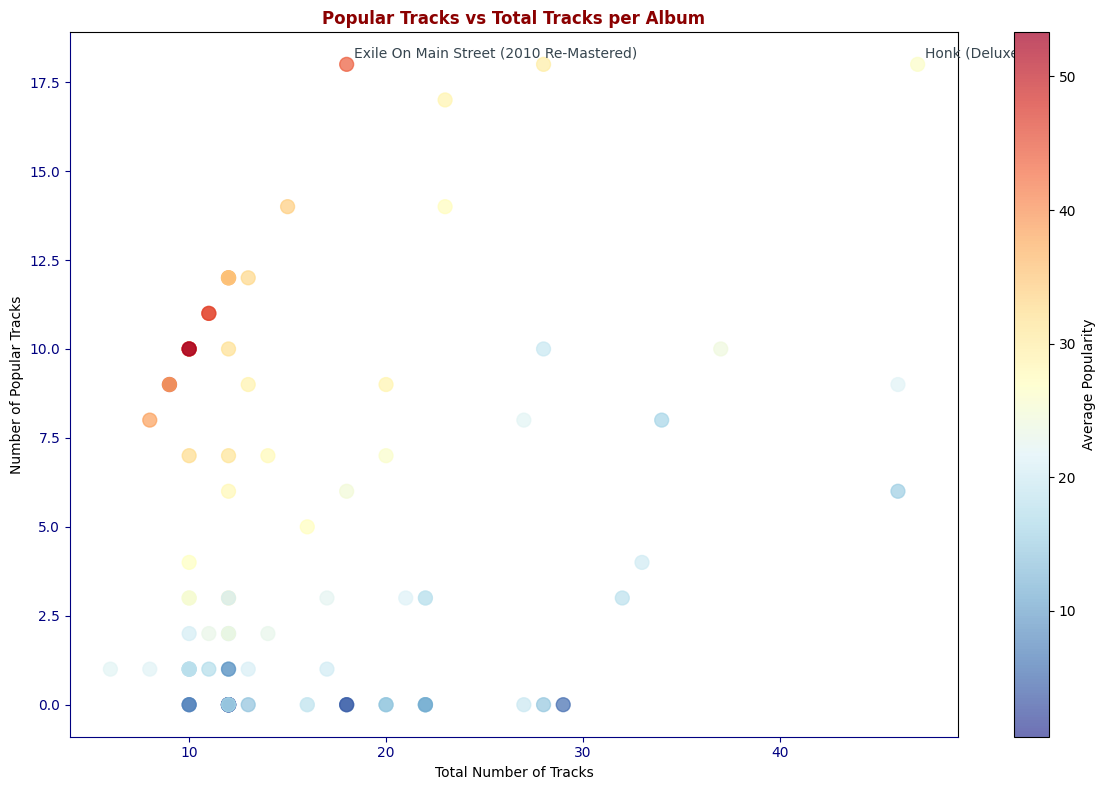

In [9]:
# Identifying the top 2 top albums based on popularity.

# Bring in Visual Formatting and Styling
%run "./00_Py_Spotify_Styling.ipynb"

# Define popularity threshold (top 25%)
popularity_threshold = full_tracks['popularity'].quantile(0.75)
full_tracks['is_popular'] = full_tracks['popularity'] >= popularity_threshold

# Calculate popularity metrics for each album
album_popularity = full_tracks.groupby('album').agg({
    'popularity': 'mean',
    'is_popular': ['sum', 'count']
}).reset_index()

# Flatten column names
album_popularity.columns = ['album', 'avg_popularity', 'popular_track_count', 'total_tracks']

# Calculate ratio of popular songs
album_popularity['popular_ratio'] = album_popularity['popular_track_count'] / album_popularity['total_tracks']

# Calculate mean number of popular tracks and avg_popularity threshold
mean_popular_tracks = album_popularity['popular_track_count'].mean()
avg_popularity_threshold = album_popularity['avg_popularity'].quantile(2/3)

# Filter albums based on both popular track count and average popularity
filtered_albums = album_popularity[
    (album_popularity['popular_track_count'] >= mean_popular_tracks)
].sort_values('popular_track_count', ascending=False)

# Display the data for the top albums
print("Top Albums by # of Popular Tracks and Avg Popularity:")
display(filtered_albums[['album', 'popular_track_count', 'total_tracks', 'avg_popularity']])

# Identify and display the top two albums
top_two_albums = filtered_albums.head(2)
print("\nTop Two Albums Recommended Based on Number of Popular Songs and Average Popularity:")
display(top_two_albums[['album', 'popular_track_count', 'total_tracks', 'avg_popularity']])

# Create the scatter plot
fig, ax = plt.subplots(figsize=FIGURE_SIZES['medium'])

# Turn off the grid before creating the scatter plot. We will add custom styling later.
ax.grid(False)

scatter = ax.scatter(album_popularity['total_tracks'], album_popularity['popular_track_count'], 
                     c=album_popularity['avg_popularity'], cmap='RdYlBu_r', 
                     s=100, alpha=0.7)

# Annotate points for the top two albums
for _, album in top_two_albums.iterrows():
    ax.annotate(album['album'], 
                (album['total_tracks'], album['popular_track_count']),
                xytext=(5, 5), textcoords='offset points',
                color=PLOT_STYLES['text_color'])

ax.set_xlabel('Total Number of Tracks')
ax.set_ylabel('Number of Popular Tracks')

# Add color bar to show average popularity
cbar = plt.colorbar(scatter)
cbar.set_label('Average Popularity')

# Apply custom styling with grid turned off
apply_stones_style(fig, ax, 'Popular Tracks vs Total Tracks per Album', show_grid=False)
plt.tight_layout()
plt.show()

---

## Module 4: Comprehensive Popularity Correlation and Temporal Analysis

### Purpose
This module conducts an in-depth analysis of the relationships between audio features and song popularity, with sophisticated temporal analysis to understand how musical preferences have evolved over the Rolling Stones' career.

### Key Components

#### **1. Feature-Popularity Correlation Matrix**
```python
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity']
```

**Correlation Analysis Results**:
- **Positive Correlators** (↗ popularity):
  - **Danceability**: +0.162 (strongest positive influence)
  - **Loudness**: +0.129 (production quality factor)
  - **Acousticness**: +0.126 (surprising - acoustic appeal)
  - **Valence**: +0.069 (positive musical mood)

- **Negative Correlators** (↘ popularity):
  - **Liveness**: -0.223 (strongest negative - studio preference)
  - **Speechiness**: -0.136 (musical over spoken content)
  - **Energy**: -0.080 (counterintuitive finding)
  - **Tempo**: -0.059 (moderate tempo preferred)

#### **2. Advanced Temporal Segmentation**
```python
full_tracks['decade'] = pd.to_datetime(full_tracks['release_date']).dt.year // 10 * 10
recent_tracks = full_tracks[full_tracks['decade'] >= 2000]
older_tracks = full_tracks[full_tracks['decade'] < 2000]
```

**Era-Based Analysis**:
- **Recent Era** (2000+): Modern listening preferences
- **Classic Era** (pre-2000): Historical catalog analysis
- **Comparative Framework**: Evolution of popularity factors

#### **3. Sophisticated Visualization Strategy**

**Correlation Bar Chart**:
- Sorted by correlation strength (negative to positive)
- Custom Stones red color scheme
- Clear identification of influence direction
- Professional axis labeling and formatting

**Temporal Comparison Visualization**:
- Side-by-side bar chart comparing eras
- Color-coded for era distinction
- Reveals shifts in musical taste over time
- Legend positioning for clarity

### Key Analytical Insights

#### **Surprising Findings**:
1. **Studio Preference**: Live versions significantly less popular (-0.223)
2. **Energy Paradox**: High energy doesn't guarantee popularity (-0.080)  
3. **Acoustic Appeal**: Acoustic elements surprisingly boost popularity (+0.126)
4. **Danceability Dominance**: Most important positive factor (+0.162)

#### **Musical Psychology Insights**:
- **Production Quality**: Preference for polished studio recordings
- **Accessibility**: Danceable content performs better
- **Musical Balance**: Moderate energy levels more universally appealing
- **Genre Appreciation**: Acoustic elements add sophistication

#### **Temporal Evolution Patterns**:
The comparative analysis reveals how popularity drivers have changed:
- **Consistency**: Some factors remain stable across eras
- **Evolution**: Others show significant temporal variation
- **Cultural Shifts**: Reflecting changing musical preferences

### Technical Implementation Excellence

#### **Correlation Calculation**:
```python
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')
popularity_correlations.sort_values().plot(kind='bar', color=STONES_PALETTE['red'])
```

#### **Temporal Analysis Framework**:
```python
recent_corr = recent_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')
older_corr = older_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

pd.DataFrame({'Recent (2000+)': recent_corr, 'Older (pre-2000)': older_corr}).plot(kind='bar')
```

#### **Professional Styling Integration**:
- Custom color palettes from Stones theme
- Consistent figure sizing and layout
- Professional axis rotation and labeling
- Legend positioning optimization

### Strategic Business Applications

#### **Content Strategy**:
1. **Playlist Optimization**: Prioritize danceable, studio-recorded tracks
2. **Production Decisions**: Invest in high-quality studio production
3. **Content Balance**: Avoid overly energetic or speech-heavy content
4. **Acoustic Integration**: Include acoustic versions for broader appeal

#### **Marketing Intelligence**:
- **Data-Driven Promotion**: Focus on tracks with positive correlation features
- **Era-Specific Campaigns**: Tailor promotion based on temporal insights
- **Fan Segmentation**: Different strategies for different time period preferences

---


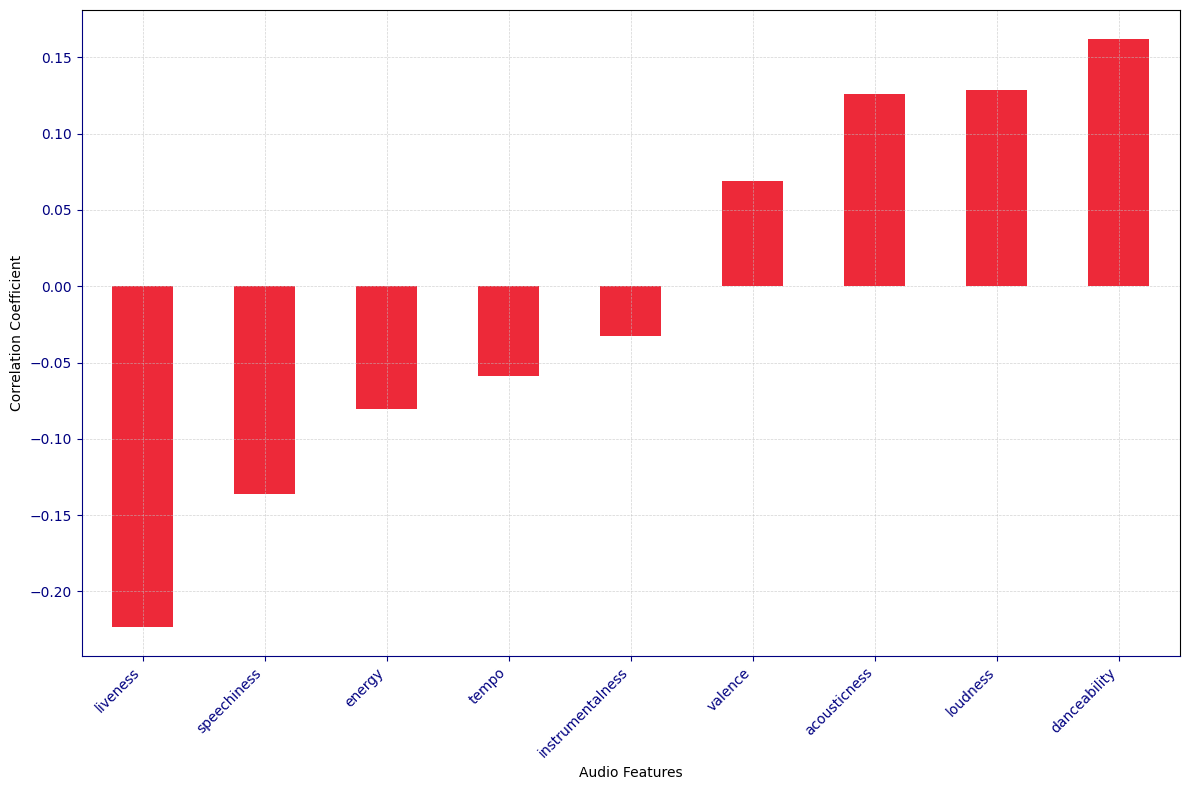

Correlations by popularity:
acousticness        0.125891
danceability        0.161753
energy             -0.080339
instrumentalness   -0.032478
liveness           -0.223062
loudness            0.128766
speechiness        -0.136353
tempo              -0.059103
valence             0.069230
Name: popularity, dtype: float64


<Figure size 1200x800 with 0 Axes>

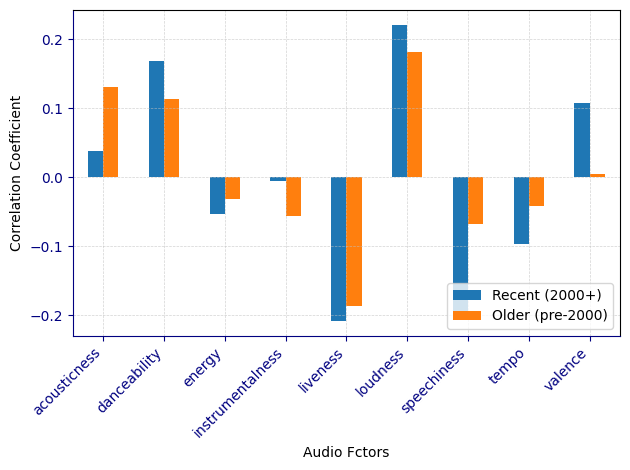

In [10]:
# Calculate correlations between popularity and audio features
popularity_correlations = full_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

# Visualize correlations
plt.figure(figsize=FIGURE_SIZES['medium'])
popularity_correlations.sort_values().plot(kind='bar', color=STONES_PALETTE['red'])
plt.title('Correlation of Audio Features with Popularity', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Features')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations by popularity:")
print(popularity_correlations)

# Create decade feature and perform time-based analysis
full_tracks['decade'] = pd.to_datetime(full_tracks['release_date']).dt.year // 10 * 10
recent_tracks = full_tracks[full_tracks['decade'] >= 2000]
older_tracks = full_tracks[full_tracks['decade'] < 2000]

recent_corr = recent_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')
older_corr = older_tracks[AUDIO_FEATURES + ['popularity']].corr()['popularity'].drop('popularity')

plt.figure(figsize=FIGURE_SIZES['medium'])
pd.DataFrame({'Recent (2000+)': recent_corr, 'Older (pre-2000)': older_corr}).plot(kind='bar')
plt.title('Popularity: Newer vs Older Tracks', fontsize=16, color=PLOT_STYLES['title_color'])
plt.ylabel('Correlation Coefficient')
plt.xlabel('Audio Fctors')
plt.xticks(rotation=45, ha='right')
apply_stones_style(plt.gcf(), plt.gca(), '')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()